In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

Plotting IRIS data

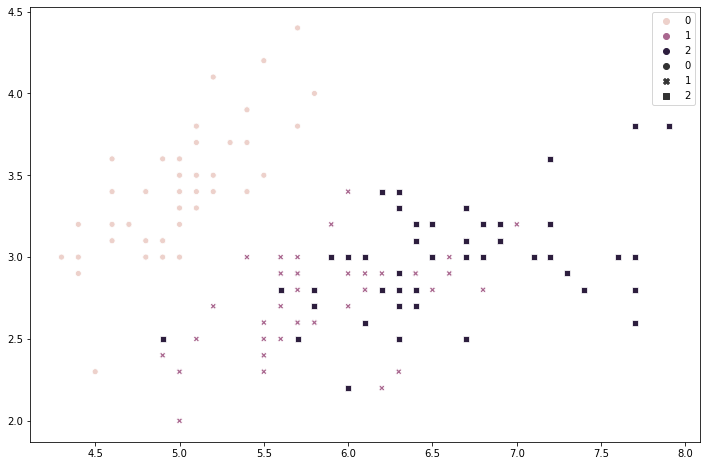

In [2]:
#plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, style = y)

Standardizing data

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Computing Eigenvectors and Eigenvalues

1. Calculating covariance matrix

In [4]:
cov = np.cov(X.T)
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

2. Eigendecomposition of covariance matrix

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(cov)
print("Eigenvector : \n" , eigen_vectors ,  "\n")
print("Eigenvalues : \n" , eigen_values , "\n")

Eigenvector : 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 

Eigenvalues : 
 [2.93808505 0.9201649  0.14774182 0.02085386] 



3. Projection matrix from first two vectos

In [6]:
projection_matrix = (eigen_vectors.T[:][:2]).T
projection_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

4. Calculating components using projection matrix

In [7]:
X_pca = X.dot(projection_matrix)
X_pca.shape

(150, 2)